In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Datasets/'Kaggle Transformed'



'X_test without PCA.csv'  'X_train without PCA.csv'   y_test.csv
'X_test with PCA.csv'	  'X_train with PCA.csv'      y_train.csv


In [5]:
import pandas as pd

In [6]:
X_train = pd.read_csv('/content/drive/MyDrive/Datasets/Kaggle Transformed/X_train without PCA.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Datasets/Kaggle Transformed/y_train.csv').values.ravel()
X_test = pd.read_csv('/content/drive/MyDrive/Datasets/Kaggle Transformed/X_test without PCA.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Datasets/Kaggle Transformed/y_test.csv').values.ravel()

In [7]:
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.065, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.065, max_depth=6, n_estimators=1000,
                          random_state=42)

In [8]:
y_pred = gb_model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.109752155103299
Mean Squared Error: 3.0458207013339904
R-squared: 0.9658113682489387


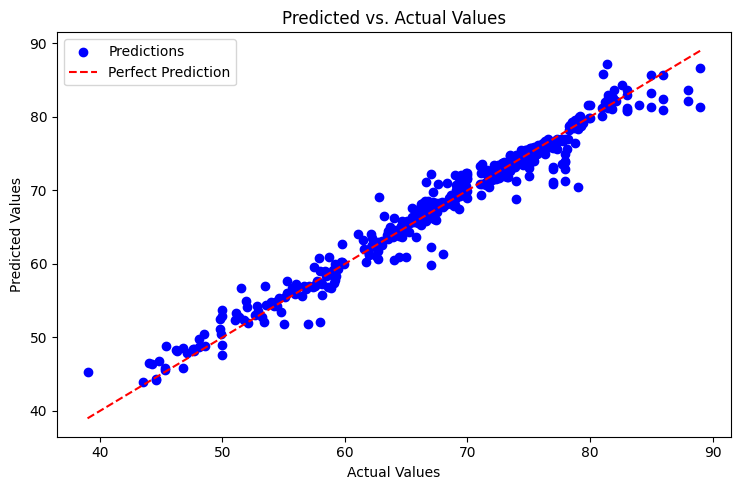

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))


ax.scatter(y_test, y_pred, color='blue', label='Predictions')


min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
ax.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')


ax.set_title('Predicted vs. Actual Values')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')



ax.set_aspect(0.6)


ax.legend()


plt.tight_layout()
plt.show()

HIV/AIDS: 0.5421505935781131
Income composition of resources: 0.2268410805875238
Adult mortality: 0.12771347814752151
BMI: 0.030144874604373983
Thinness 1-19 years: 0.013200425397306174
Alcohol: 0.011864601545864937
Schooling: 0.01147337068184874
Infant deaths: 0.011357875087091466
Total expenditure: 0.007409549890133251
Percentage expenditure: 0.0052442692393993625
Polio: 0.0038944355081793457
Hepatitis B: 0.003267464936283883
Measles: 0.002954810713723051
Diphtheria: 0.002483170082637291


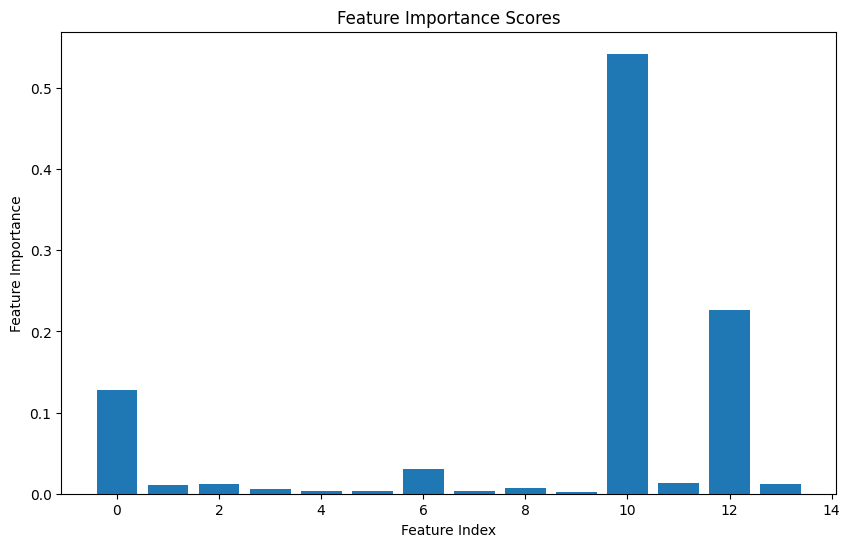

In [41]:
feature_importances = gb_model.feature_importances_
feature_names = X_train.columns

feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Scores")
plt.show()

In [32]:
from sklearn.feature_selection import SelectFromModel


selector = SelectFromModel(gb_model, threshold=0.02, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)

Selected features: [ 0  6 10 12]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [35]:

model_selected = GradientBoostingRegressor(n_estimators=375, learning_rate=0.025, max_depth=5, random_state=42)
model_selected.fit(X_train_selected, y_train)


y_pred_selected = model_selected.predict(X_test_selected)


mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print("Performance with selected features:")
print("Mean Squared Error:", mse_selected)
print("R-squared:", r2_selected)

Performance with selected features:
Mean Squared Error: 4.4348508530010875
R-squared: 0.9502198265913262


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [ 375,400,425],
    'learning_rate': [0.02,0.025, 0.03, 0.035],
    'max_depth': [4,5],
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train_selected, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.025, 'max_depth': 5, 'n_estimators': 375}


In [ ]:
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

In [ ]:
tuned_mae = mean_absolute_error(y_test,y_pred)
tuned_mse = mean_squared_error(y_test, y_pred)
tuned_r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (Tuned Model):", tuned_mae)
print("Mean Squared Error (Tuned Model):", tuned_mse)
print("R-squared (Tuned Model):", tuned_r2)

Mean Absolute Error (Tuned Model): 1.1237813416870635
Mean Squared Error (Tuned Model): 3.0337270856514933
R-squared (Tuned Model): 0.9659471162832621
